In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

# Load the data
binary_image1 = np.load('CerclesI1.npy')
print(binary_image1.shape[0])
binary_image2 = np.load('CerclesI2.npy')
print(binary_image2.shape)
center_image1= np.load('CerclesC1.npy')

print("center_image1",center_image1)
center_image2= np.load('CerclesC2.npy')
print("center_image2",center_image2)

264
(264, 264)
center_image1 [[136.5        136.5       ]
 [136.41666667 156.5       ]
 [136.5        176.5       ]
 [136.375      146.5       ]
 [136.375      166.5       ]
 [148.         148.        ]
 [156.41666667 136.5       ]
 [176.41666667 136.5       ]
 [196.41666667 136.5       ]
 [216.41666667 136.5       ]
 [236.41666667 136.5       ]
 [256.5        136.5       ]]
center_image2 [[136.5        136.5       ]
 [136.45833333 156.5       ]
 [136.5        176.5       ]
 [136.375      146.5       ]
 [136.375      166.5       ]
 [146.375      136.5       ]
 [148.         148.        ]
 [156.45833333 136.5       ]
 [166.375      136.5       ]
 [176.45833333 136.5       ]
 [186.375      136.5       ]
 [196.45833333 136.5       ]
 [206.375      136.5       ]
 [216.5        136.5       ]]


In [2]:
# Object points in 3D space
objp = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1.15, 1.15, 0],
    [0, 2, 0],
    [0, 3, 0],
    [0, 4, 0],
    [2,0,0],
    [4,0,0],
    [6,0,0],
    [8,0,0],
    [10,0,0],
    [12,0,0],
    [0,0,1],
    [0,0,2],
    [0,0,3],
    [0,0,4],
    [0,0,5],
    [0,0,6],
    [0,0,7],
    [0,0,8]


], dtype=np.float32)
print(objp)
# Image points in 2D space for image 1
import numpy as np

# Assuming `center_image1` and `center_image2` are arrays or lists containing coordinates

# Image points in 2D space for image 1
imgpoints1 = np.array([
    [center_image1[0][0], center_image1[0][1]],
    [center_image1[3][0], center_image1[3][1]],
    [center_image1[5][0], center_image1[5][1]],
    [center_image1[1][0], center_image1[1][1]],
    [center_image1[4][0], center_image1[4][1]],
    [center_image1[2][0], center_image1[2][1]],
    [center_image1[6][0], center_image1[6][1]],
    [center_image1[7][0], center_image1[7][1]],
    [center_image1[8][0], center_image1[8][1]],
    [center_image1[9][0], center_image1[9][1]],
    [center_image1[10][0], center_image1[10][1]],
    [center_image1[11][0], center_image1[11][1]],
    [0,0],
    [0,0],
    [0,0],
    [0,0],
    [0,0],
    [0,0],
    [0,0],
    [0,0]

], dtype=np.float32)
imgpoints1 = np.reshape(imgpoints1, (-1,1,2))
# Image points in 2D space for image 2
imgpoints2 = np.array([
    [center_image2[0][0], center_image2[0][1]],
    [center_image2[3][0], center_image2[3][1]],
    [center_image2[6][0], center_image2[6][1]],
    [center_image2[1][0], center_image2[1][1]],
    [center_image2[4][0], center_image2[4][1]],
    [center_image2[2][0], center_image2[2][1]],
    [0,0],
    [0,0],
    [0,0],
    [0,0],
    [0,0],
    [0,0],
    [center_image2[5][0], center_image2[5][1]],
    [center_image2[7][0], center_image2[7][1]],
    [center_image2[8][0], center_image2[8][1]],
    [center_image2[9][0], center_image2[9][1]],
    [center_image2[10][0], center_image2[10][1]],
    [center_image2[11][0], center_image2[11][1]],
    [center_image2[12][0], center_image2[12][1]],
    [center_image2[13][0], center_image2[13][1]]

], dtype=np.float32)
imgpoints2 = np.reshape(imgpoints2, (-1,1,2))
print(imgpoints2)

[[ 0.    0.    0.  ]
 [ 0.    1.    0.  ]
 [ 1.15  1.15  0.  ]
 [ 0.    2.    0.  ]
 [ 0.    3.    0.  ]
 [ 0.    4.    0.  ]
 [ 2.    0.    0.  ]
 [ 4.    0.    0.  ]
 [ 6.    0.    0.  ]
 [ 8.    0.    0.  ]
 [10.    0.    0.  ]
 [12.    0.    0.  ]
 [ 0.    0.    1.  ]
 [ 0.    0.    2.  ]
 [ 0.    0.    3.  ]
 [ 0.    0.    4.  ]
 [ 0.    0.    5.  ]
 [ 0.    0.    6.  ]
 [ 0.    0.    7.  ]
 [ 0.    0.    8.  ]]
[[[136.5     136.5    ]]

 [[136.375   146.5    ]]

 [[148.      148.     ]]

 [[136.45833 156.5    ]]

 [[136.375   166.5    ]]

 [[136.5     176.5    ]]

 [[  0.        0.     ]]

 [[  0.        0.     ]]

 [[  0.        0.     ]]

 [[  0.        0.     ]]

 [[  0.        0.     ]]

 [[  0.        0.     ]]

 [[146.375   136.5    ]]

 [[156.45833 136.5    ]]

 [[166.375   136.5    ]]

 [[176.45833 136.5    ]]

 [[186.375   136.5    ]]

 [[196.45833 136.5    ]]

 [[206.375   136.5    ]]

 [[216.5     136.5    ]]]


In [3]:
img = cv.imread("CerclesC1.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
# Here, you need to specify your initial guess for the intrinsic matrix
initial_intrinsic_matrix = np.array([[7.5, 0, len(gray)/2],
                                     [0, 7.5, len(gray)/2],
                                     [0, 0, 1]])
for imgp in [imgpoints1,imgpoints2]:
    objpoints.append(objp)
    imgpoints.append(imgp)

    ret,mtx,dist,rvecs,tvecs = cv.calibrateCamera(objpoints,imgpoints, gray.shape[::-1], initial_intrinsic_matrix,None,None, flags=cv.CALIB_USE_INTRINSIC_GUESS)

In [5]:
print(rvecs)
print("rvecs1",rvecs[0])
print("rvecs2",rvecs[1])
##matrice de rotation => convertir le vecteur en matrice
print("(rvecs[0])[0] ",(rvecs[0])[0] )
rmatRight = cv.Rodrigues(rvecs[0])[0] 
print("rmatRight",rmatRight)
rmatLeft = cv.Rodrigues(rvecs[1])[0]  

print("tvecs[0]",tvecs[0])
print("tvecs[1]",tvecs[1])
#matrice complète [R|t] => ajouter t dans R
rotMatRight = np.concatenate((rmatRight,tvecs[0]), axis=1)
rotMatLeft = np.concatenate((rmatLeft,tvecs[1]), axis=1)

(array([[ 1.71421296],
       [ 0.93645588],
       [-1.91618015]]), array([[ 3.12132547],
       [-5.41613321],
       [ 0.64287524]]))
rvecs1 [[ 1.71421296]
 [ 0.93645588]
 [-1.91618015]]
rvecs2 [[ 3.12132547]
 [-5.41613321]
 [ 0.64287524]]
(rvecs[0])[0]  [1.71421296]
rmatRight [[-0.16583303  0.6875634  -0.70693421]
 [ 0.13530718 -0.6942161  -0.70693421]
 [-0.9768272  -0.21288632  0.02209169]]
tvecs[0] [[ 7.97764763e-14]
 [ 7.98548020e-14]
 [-5.77799596e-15]]
tvecs[1] [[ 4.08421155]
 [ 6.21952739]
 [-0.3667032 ]]


In [6]:
#matrice de la camera @ RT
camLeft = mtx @ rotMatLeft
camRight = mtx @ rotMatRight

# trouver cx et cy (coo centre optique dans limage) pour les 2 cameras
camWorldCenterLeft = np.linalg.inv(np.concatenate((rotMatLeft,[[0,0,0,1]]), axis=0)) @ np.transpose([[0,0,0,1]])
camWorldCenterRight = np.linalg.inv(np.concatenate((rotMatRight,[[0,0,0,1]]), axis=0)) @ np.transpose([[0,0,0,1]])
print('Centre Gauche\n',camWorldCenterLeft) #1colonne à 4lignes
print('Centre Gauche\n', camWorldCenterRight) #1colonne à 4lignes
def crossMat(v):
    v = v[:, 0]   # Matrice ligne afin d'accéder plus facilement aux valeurs v[1]...
    return np.array([[0, -v[2], v[1]],
                     [v[2], 0, -v[0]],
                     [-v[1], v[0], 0]])

def matFondamental(camLeft,centerRight,camRight):
        
        return np.array((crossMat(camLeft @ centerRight)) @ camLeft @ np.linalg.pinv(camRight))
    


Centre Gauche
 [[-4.08451575]
 [-6.21895095]
 [ 0.37303652]
 [ 1.        ]]
Centre Gauche
 [[-3.21945689e-15]
 [-6.44952564e-16]
 [ 1.12976457e-13]
 [ 1.00000000e+00]]


In [7]:
def mark_circle_centers(binary_image, center_image):
    # Create a new image with the same dimensions as binary_image
    center_marked_image = np.zeros_like(binary_image)
    
    # Iterate through each center and mark it as 1
    for center in center_image:
        # Retrieve center coordinates
        center_x, center_y = int(center[1]), int(center[0])  # Convert to integers
        
        # Ensure the center coordinates are within the bounds of the image
        if 0 <= center_x < binary_image.shape[1] and 0 <= center_y < binary_image.shape[0]:
            # Mark the center as 1 in the new image
            center_marked_image[center_y, center_x] = 1
    
    return center_marked_image

Shape of center_marked_image1: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of center_marked_image2: (264, 264)


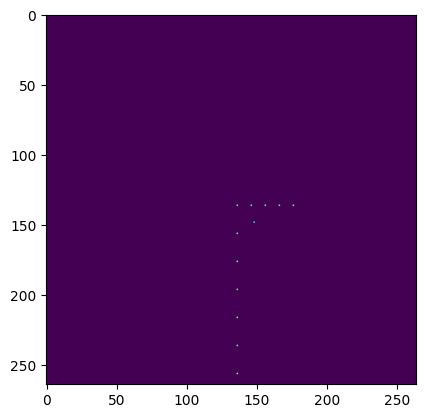

In [8]:
# Mark circle centers in both binary images
center_marked_image1 = mark_circle_centers(binary_image1, center_image1)
center_marked_image2 = mark_circle_centers(binary_image2, center_image2)

# Display the shape of the new images
print("Shape of center_marked_image1:", center_marked_image1)
print("Shape of center_marked_image2:", center_marked_image2.shape)

plt.imshow(center_marked_image1)
plt.show()

In [9]:
def getEpiLines(F, points):
    return F @ points


def findEpilines(path,center_image):
    epilines = [] # liste de chaque point gauche associe à sa ligne epipolaire
    for l in range(1):  #parcourt dossier images (26)
        
            strp = path 
    
    strp = path
    
        
        
    red = mark_circle_centers(strp, center_image)
    print("red",red)
    tempEpilines = []  #epiline associées a leurs points gauches temporairement 
    pointsLeft = [[],[],[]]
#Trouver Les points left'''        
    #i = lindice de chaque ligne epipolaire
    for i, line in enumerate(red):  #line = une liste de pixels rouges
        for pixel in line:
            if pixel != 0:
                pixel = 1
        try:
            #weighted average => (0*0 + 1*0 + 2*0 + ... + 1248 * 1 + 1249 * 0) / n° of red pixels
            #for instance => (1261+1262+1267)/3 = 1263.33
            #give position of the red line in x axis
            pointsLeft[0].append(np.average(range(264), weights = line)) #calcul des points de chaque ligne epipolair
                                    # moyenne pondere : on parcourt limage horizantalement de position 0 a position 1920
                                    #ces positions sont multipliés par la valeur du pixel(0 ou 1 cad rouge ou non)
            pointsLeft[1].append(i) # y axis
            pointsLeft[2].append(1)  
        except:
            pass
        #A partir de la ligne rouge de l'image de gauche, trouver l'épiline correspondante sur l'image de droite.
        #Trouver les épilines sur l'image de droite de tous les points rouges de l'image de gauche.

            #Calculer les epilines grace a la fonction getEpilines''' 
        
    print("pointsLeft",pointsLeft)    
    epilinesRight = getEpiLines(Fondamental, pointsLeft)
    
    tempEpilines.append(pointsLeft)
    tempEpilines.append(epilinesRight)
    epilines.append(tempEpilines)  # # liste de chaque point gauche associe à sa aligne epipolaire
    print("epilines",epilines)
    return epilines  

In [10]:
Fondamental = matFondamental(camRight,camWorldCenterLeft,camLeft)


epl = findEpilines(binary_image2, center_image2)  #liste de chaque point gauche associe à sa lignes epipolaires de la camera droite stocke sous forme de matrice a 2 colonnes
#scan gauche vers droite
epl= np.array(epl)
coef , length = epl[0][1].shape
print("coef , length ",coef , length )
print(epl.shape)
print(epl[0][1])

def lineY(coefs,x):
    a,b,c = coefs
    return-(c+a*x)/b

red [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
pointsLeft [[156.0, 136.0, 148.0, 136.0, 136.0, 136.0, 136.0, 136.0, 136.0, 136.0], [136, 146, 148, 156, 166, 176, 186, 196, 206, 216], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
epilines [[[[156.0, 136.0, 148.0, 136.0, 136.0, 136.0, 136.0, 136.0, 136.0, 136.0], [136, 146, 148, 156, 166, 176, 186, 196, 206, 216], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], array([[ 7.03251160e+01,  1.82663487e+02,  1.38837366e+02,
         2.12134614e+02,  2.41605740e+02,  2.71076867e+02,
         3.00547993e+02,  3.30019120e+02,  3.59490246e+02,
         3.88961372e+02],
       [ 6.80383502e+01,  1.89473339e+02,  1.39318777e+02,
         2.17856378e+02,  2.46239416e+02,  2.74622455e+02,
         3.03005494e+02,  3.31388532e+02,  3.59771571e+02,
         3.88154610e+02],
       [-3.31601366e+04, -8.92534135e+04, -6.66891459e+04,
        -1.03118037e+05, -1.16982660e+

[[ 7.03251160e+01  1.82663487e+02  1.38837366e+02  2.12134614e+02
   2.41605740e+02  2.71076867e+02  3.00547993e+02  3.30019120e+02
   3.59490246e+02  3.88961372e+02]
 [ 6.80383502e+01  1.89473339e+02  1.39318777e+02  2.17856378e+02
   2.46239416e+02  2.74622455e+02  3.03005494e+02  3.31388532e+02
   3.59771571e+02  3.88154610e+02]
 [-3.31601366e+04 -8.92534135e+04 -6.66891459e+04 -1.03118037e+05
  -1.16982660e+05 -1.30847283e+05 -1.44711906e+05 -1.58576529e+05
  -1.72441153e+05 -1.86305776e+05]]
3
10
3
10


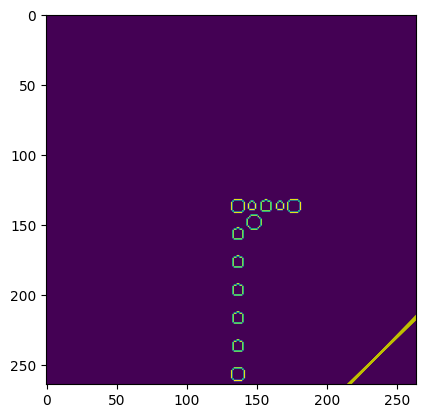

In [11]:
def drawEpl(fname,EplRight):
    print(EplRight)
    #img = cv.imread(fname)
    img=fname
    
    coef , length = EplRight.shape #shape=number of elements in each dimension.
                                    #coef= nbre de lignes , length = nbre colonnes
    print(coef)
    print(length)
    print(coef)
    print(length)
    
    for i in range(0,length): #40 = le pas, pn dessine les epilines avec un intervalle de 40 verticalement donc jsq 1080
        plt.plot([0,264],[lineY(EplRight[:,i],0),lineY(EplRight[:,i],264)],'y')
        
        
    plt.imshow(img)
    plt.show()
drawEpl(binary_image1,epl[0][1])